## Segmentation + style transfer

for each segmentation
* transfer style to bs (limited to 1 kind)
* keep : lst(centroid), lst(coordinate space),lst(bs_style)

* once extracted all information, paint by segmentation; 20, 20, 500


####  segmentation 20, 50, 500
* extract each segment for style transfer from original picture
    * 20 segments - covering surface
    * 200 segments - covering most
    * 500 segments - covering enough






In [1]:
import numpy as np
import cv2

#import random
import matplotlib.pyplot as plt

%matplotlib inline

#import os

#from PIL import Image

#import pandas as pd

from skimage.segmentation import slic
#https://scikit-image.org/docs/dev/api/skimage.segmentation.html#skimage.segmentation.slic

from skimage.color import label2rgb

In [2]:
path="./data/paints_AH/"
path_bs_ext='./data/bs_external/'

In [3]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image.astype(np.uint8), cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    
def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original.astype(np.uint8))#, cmap=plt.cm.gray
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered.astype(np.uint8))#, cmap=plt.cm.gray
    ax2.set_title(img_title_filtered)
    ax2.axis('off')
    
def plot_orig(img_original):
    fig, (ax1) = plt.subplots(ncols=1, figsize=(8, 6), sharex=True, sharey=True)
    ax1.imshow(img_original.astype(np.uint8))#, cmap=plt.cm.gray
    ax1.set_title('Original')
    ax1.axis('off')  
    plt.show()
    
    
def plot_segments(lst_segments, lst_Nsegments):
    
    fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(8, 10), sharex=True, sharey=True)    
    
    for  i,k in enumerate(lst_segments):
        exec(f'ax{i+1}.imshow(k.astype(np.uint8), cmap=plt.cm.gray)') 
        exec(f'ax{i+1}.set_title( str(lst_Nsegments[i]) )') 
        exec(f'ax{i+1}.axis("off")') 
        
    

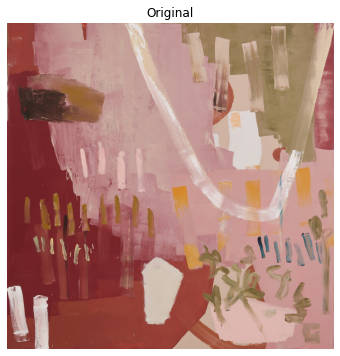

MSE 20 segments:858.788
MSE 200 segments:274.178
MSE 500 segments:165.120


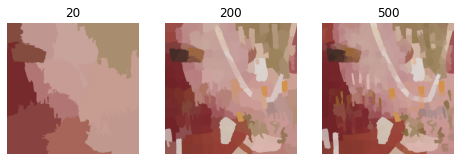

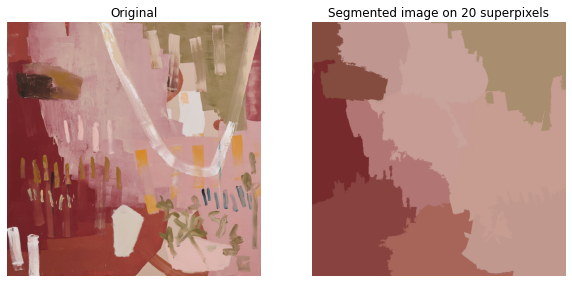

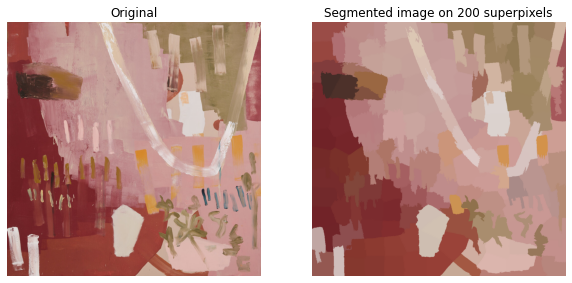

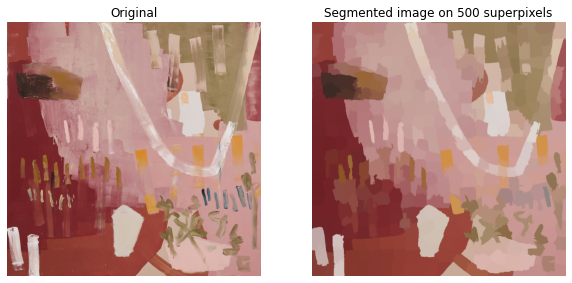

In [4]:
#inpath='./data/02_paintings/'
inpath='./data/paints_AH/'

nameInFile="AH05.jpg"

original_image = plt.imread(inpath + nameInFile,np.uint8)
plot_orig(original_image)

# Obtain the segmentation with n diff regions
lst_Nsegments=[20,200,500] #1, 1500,2000, 4000
lst_segments =[]
img_segments=[]


for n, Nsegm in enumerate(lst_Nsegments):
    segments_k = slic(original_image, n_segments=Nsegm, start_label=1,compactness = 10)
    lst_segments.append(segments_k)
    
    # Put segments on top of original image to compare
    exec(f'segmented_image_{lst_Nsegments[n]} = label2rgb(segments_k, original_image, kind="avg",bg_label=0)') #overlay
    exec(f'img_segments.append(segmented_image_{lst_Nsegments[n]})')
    
    
plot_segments(img_segments,lst_Nsegments)


# Show the segmented image

for i in range(len(lst_Nsegments)):
    plot_comparison(original_image.astype(np.uint8), img_segments[i].astype(np.uint8), f'Segmented image on {lst_Nsegments[i]} superpixels')


for i in range(len(lst_Nsegments)):
    Y = np.square(np.subtract(original_image,img_segments[i])).mean()
    print(f"MSE %.0f segments:%.3f"%(lst_Nsegments[i],Y))

In [16]:
# lst_segments --> segmented_image_20 , segmented_image_200 ,segmented_image_500

type(img_segments[0])
img_segments[0]

array([[[131.17229152,  76.44921142,  63.95606638],
        [131.17229152,  76.44921142,  63.95606638],
        [131.17229152,  76.44921142,  63.95606638],
        ...,
        [169.95314347, 141.07860376, 111.84438026],
        [169.95314347, 141.07860376, 111.84438026],
        [169.95314347, 141.07860376, 111.84438026]],

       [[131.17229152,  76.44921142,  63.95606638],
        [131.17229152,  76.44921142,  63.95606638],
        [131.17229152,  76.44921142,  63.95606638],
        ...,
        [169.95314347, 141.07860376, 111.84438026],
        [169.95314347, 141.07860376, 111.84438026],
        [169.95314347, 141.07860376, 111.84438026]],

       [[131.17229152,  76.44921142,  63.95606638],
        [131.17229152,  76.44921142,  63.95606638],
        [131.17229152,  76.44921142,  63.95606638],
        ...,
        [169.95314347, 141.07860376, 111.84438026],
        [169.95314347, 141.07860376, 111.84438026],
        [169.95314347, 141.07860376, 111.84438026]],

       ...,

      

In [26]:
#label2rgb?
slic?

### including the segments in lists:

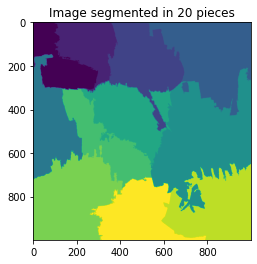

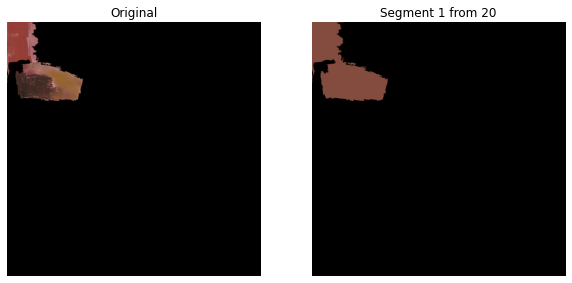

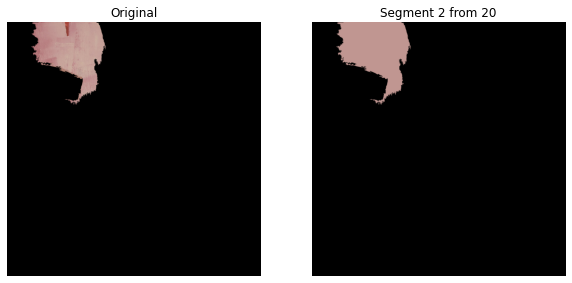

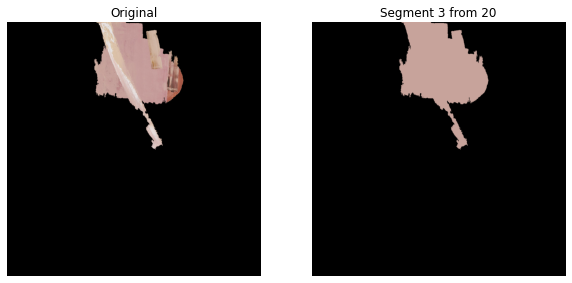

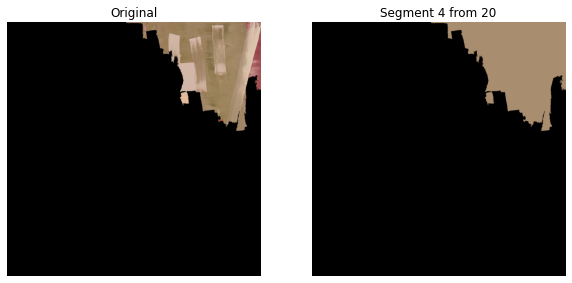

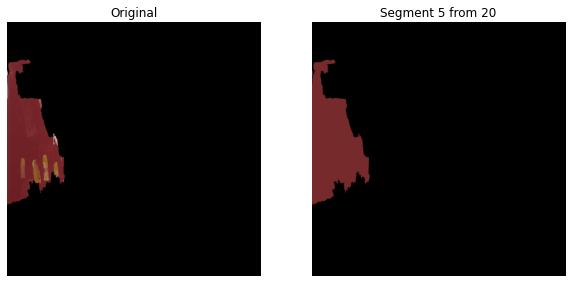

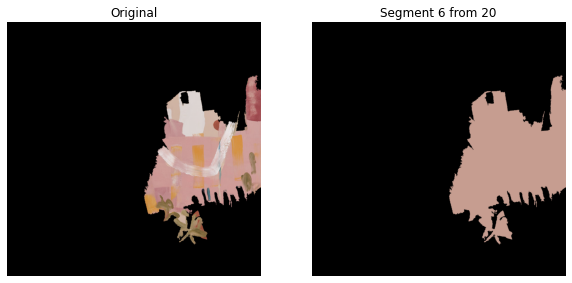

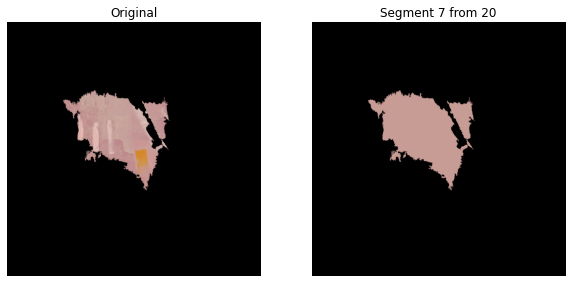

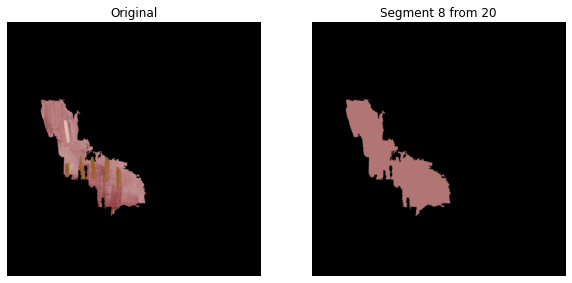

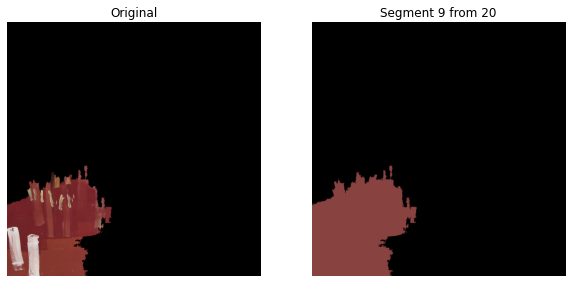

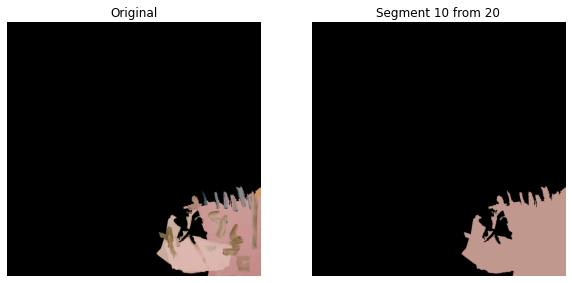

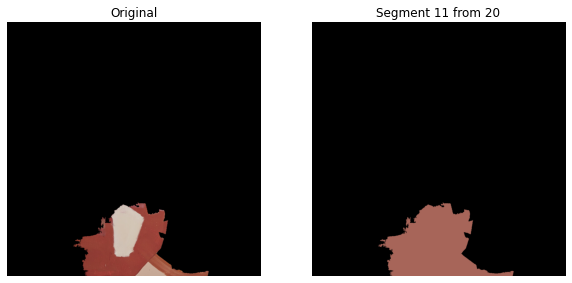

In [34]:
lst_segment_k=[]

k=0
    
    
plt.imshow(lst_segments[k])
plt.title(f'Image segmented in {lst_Nsegments[k]} pieces')
plt.show()


for i in np.unique(lst_segments[k]):
    
    mask_i = (lst_segments[k][:]==i)
    mask_else= ~mask_i
    image_k=original_image.copy()
    image_k[:,:,:3][mask_i]=original_image[:,:,:3][mask_i]
    image_k[:,:,:3][mask_else]=[0,0,0]
    
    exec(f'segment_k=segmented_image_{lst_Nsegments[0]}.copy()')    
    segment_k[mask_else]=[0,0,0]
    
    plot_comparison( image_k.astype(np.uint8),segment_k.astype(np.uint8), f'Segment {i} from {lst_Nsegments[0]}')
    #plt.imshow(image_k)
    #plt.title('segment'+str(i))
    #plt.show()
        
    lst_segment_k.append(image_k)
    


In [65]:
#crop the image for each segment
"""
keep
.- coord  - later random on them to place the bs
.- cropped_segmet (original image)- later iput of style trasfer
.- color (segmentd image) - initial segments 20,200?
.- color (original image) - final segment
"""


from skimage.util import crop


k=0

lst_coord=[]
lst_color=[]
lst_cropp=[]


# Get the coordinates and color of each segment
for seg_id in np.unique(lst_segments[k]):
    
    # Get the coordinates of all pixels belonging to this segment
    coord = np.column_stack(np.where(lst_segments[k] == seg_id))
    lst_coord.append(coord)
    
     # Get the bounding box of this segment
    min_row, max_row = coord[:, 0].min(), coord[:, 0].max()
    min_col, max_col = coord[:, 1].min(), coord[:, 1].max()
    bbox = (min_row, min_col, max_row, max_col)
    
    # Crop the segment from the image
    cropped_image = crop(original_image, bbox)
    lst_cropp.append(cropped_image)
    
    # Get the average color of all pixels belonging to this segment
    color = np.mean(image[segmented_image_20 == seg_id], axis=0)
    lst_color.append(color)
    

TypeError: 'int' object is not iterable

In [66]:
seg_id=1
# Get the coordinates of all pixels belonging to this segment
coord = np.column_stack(np.where(lst_segments[k] == seg_id))
lst_coord.append(coord)

 # Get the bounding box of this segment
min_row, max_row = coord[:, 0].min(), coord[:, 0].max()
min_col, max_col = coord[:, 1].min(), coord[:, 1].max()
bbox = (min_row, min_col, max_row, max_col)

# Crop the segment from the image
cropped_image = crop(original_image, bbox)
lst_cropp.append(cropped_image)

# Get the average color of all pixels belonging to this segment
color = np.mean(image[segmented_image_20 == seg_id], axis=0)
lst_color.append(color)


ValueError: crop_width has an invalid length: 4
crop_width should be a sequence of N pairs, a single pair, or a single integer

In [69]:
print(min_row, max_row)
print(min_col, max_col)
bbox

0 310
0 297


(0, 0, 310, 297)

In [71]:
crop?

In [70]:
original_image.shape

(999, 1000, 3)

In [63]:
img_segments[0].shape

(999, 1000, 3)

In [52]:
segmented_image_20

array([[[131.17229152,  76.44921142,  63.95606638],
        [131.17229152,  76.44921142,  63.95606638],
        [131.17229152,  76.44921142,  63.95606638],
        ...,
        [169.95314347, 141.07860376, 111.84438026],
        [169.95314347, 141.07860376, 111.84438026],
        [169.95314347, 141.07860376, 111.84438026]],

       [[131.17229152,  76.44921142,  63.95606638],
        [131.17229152,  76.44921142,  63.95606638],
        [131.17229152,  76.44921142,  63.95606638],
        ...,
        [169.95314347, 141.07860376, 111.84438026],
        [169.95314347, 141.07860376, 111.84438026],
        [169.95314347, 141.07860376, 111.84438026]],

       [[131.17229152,  76.44921142,  63.95606638],
        [131.17229152,  76.44921142,  63.95606638],
        [131.17229152,  76.44921142,  63.95606638],
        ...,
        [169.95314347, 141.07860376, 111.84438026],
        [169.95314347, 141.07860376, 111.84438026],
        [169.95314347, 141.07860376, 111.84438026]],

       ...,

      

### adaptar el código siguiente para que extraiga de cada segmentación, una paleta de colores


In [ ]:
def color_to_df(input): #added also de rgb codification
    
    input_unzip = list(zip(*input[0]))
    ar_rgbs=np.array([np.array(item) for item in input_unzip[0]])
    rgbs=pd.DataFrame(ar_rgbs, columns=['R','G','B'])
    ncounts=pd.DataFrame(input_unzip[1], columns=['occurence'])

    df=pd.concat([rgbs,ncounts], axis=1)
    df['c_code']= df.apply(lambda df: rgb2hex(df.R,df.G,df.B), axis=1) 
    df['c_name']= df.apply(lambda df: get_colour_name((df.R,df.G,df.B)), axis=1) 

    return df

def exact_color(input_path,input_image, resize, tolerance, zoom,ncolors):
    
    #background template
    bg = 'bg.png'
    fig, ax = plt.subplots(figsize=(192,108),dpi=10)
    fig.set_facecolor('white')
    plt.savefig(bg)
    plt.close(fig)    
    
    #resize -limitation in order to control de output and limit the time of process
    img = Image.open(input_path+input_image)   
    print('Original image size (W,H): (',img.size[0],img.size[1],').')
    
    if img.mode in ("RGBA", "P"): img = img.convert("RGB") #added to avoid errors from diferent inputs
        
    output_width =  resize
    
    if img.size[0] != resize: # resize to all pictures, even smaller, for a nice-ouput
        wpercent = (output_width/float(img.size[0]))
        hsize = int((float(img.size[1])*float(wpercent)))
        #print(type(output_width), type(hsize),output_width,hsize)
        img = img.resize((output_width,hsize),  Image.Resampling.LANCZOS)
               
        resize_name = 'resize_'+ input_image
        img.save(input_path+resize_name)
    else:
        resize_name = input_image
    
    #create dataframe
    img_url = input_path + resize_name
    colors_x = extcolors.extract_from_path(img_url, tolerance = tolerance , limit = ncolors)
    
    
    df_color = color_to_df(colors_x)
    
    #annotate text, filtering the data to show in the palette
    df_color_complete=df_color.copy()  
    df_color=df_color.sort_values(by=['occurence'], ascending=False).head(24) #maximum 4 columns of 6 colors to show
    
    #df.color
    #df_color=df_color_complete[df_color_complete.occurence >round((img.size[0]*img.size[1])*0.001)]
    #df_color.head()
       
    
    
    print('Image resize (W,H): (',img.size[0],img.size[1],').')
    # selimita a los 24 colores mas representativos.' Minimum dots:',round((img.size[0]*img.size[1])*0.001))
    
    list_color = list(df_color['c_code'])
    list_colorName = list(df_color['c_name'])
    list_percent = [int(i) for i in list(df_color['occurence'])]
    text_c = [c + '  ' + str(round(p*100/sum(list_percent),1)) +'%' for c, p in zip(list_color, list_percent)]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(160,120), dpi = 10)
    
    #donut plot
    wedges, text = ax1.pie(list_percent,
                           labels= text_c,
                           labeldistance= 1.05,
                           colors = list_color,
                           textprops={'fontsize': 120, 'color':'black'})
    plt.setp(wedges, width=0.3)

    #add image in the center of donut plot
    img = mpimg.imread(input_path + resize_name)
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (0, 0))
    ax1.add_artist(ab)
    
    #color palette
    x_posi, y_posi, y_posi2,y_posi3  = 160, -130, -130,-130
    
    for  n,c in enumerate(list_color):
        if list_color.index(c) <= 7:
            y_posi += 130
            rect = patches.Rectangle((x_posi, y_posi), 100, 75, facecolor = c)
            ax2.add_patch(rect)
            ax2.text(x = x_posi+100, y = y_posi+50, s = list_colorName[n], fontdict={'fontsize': 120})
            
        elif list_color.index(c) <= 15:
            y_posi2 += 130
            rect = patches.Rectangle((x_posi + 600, y_posi2), 100, 75, facecolor = c)
            ax2.add_artist(rect)
            ax2.text(x = x_posi+700, y = y_posi2+50, s = list_colorName[n], fontdict={'fontsize': 120})             
            
        else:
            y_posi3 += 130
            rect = patches.Rectangle((x_posi + 600*2, y_posi3), 100, 75, facecolor = c)
            ax2.add_artist(rect)
            ax2.text(x = x_posi+1300, y = y_posi3+50, s = list_colorName[n], fontdict={'fontsize': 120})
            
           

    fig.set_facecolor('white')
    ax2.axis('off')
    bg = plt.imread('bg.png')
    plt.imshow(bg)       
    plt.tight_layout()
    plt.show()
    return df_color_complete

In [ ]:

df_colours=exact_color(path_bs,nameInFile, 900, 20, 2.5,500)#ncolors=12,aumentado a 24 para mostrar. en el df recoge todos los colores


Text(0.5, 1.0, '(197, 101, 3)')

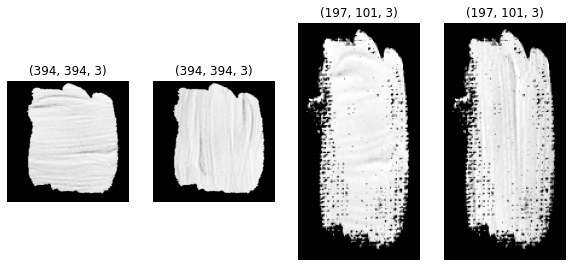

In [14]:
#2 pares de brochas extraidas de https://jiupinjia.github.io/neuralpainter/

Image1 = cv2.imread(path_bs_ext + 'brush_fromweb2_large_horizontal.png')
Image2 = cv2.imread(path_bs_ext + 'brush_fromweb2_large_vertical.png')
Image3 = cv2.imread(path_bs_ext + 'brush_fromweb2_small_horizontal.png')
Image4 = cv2.imread(path_bs_ext + 'brush_fromweb2_small_vertical.png')


fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 1
columns = 4
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)


# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title(Image1.shape)
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title(Image2.shape)
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(Image3)
plt.axis('off')
plt.title(Image3.shape)
  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(Image4)
plt.axis('off')
plt.title(Image4.shape)



In [132]:
bs1.shape

(394, 394, 3)